In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [ ]:
# Attributes in the dataset

#1) Density determined from underwater weighing
#2) Percent body fat from Siri's (1956) equation
#3) Age (years)
#4) Weight (lbs)
#5) Height (inches)
#6) Neck circumference (cm)
#7) Chest circumference (cm)
#8) Abdomen 2 circumference (cm)
#9) Hip circumference (cm)
#10) Thigh circumference (cm)
#11) Knee circumference (cm)
#12) Ankle circumference (cm)
#13) Biceps (extended) circumference (cm)
#14) Forearm circumference (cm)
#15) Wrist circumference (cm)

In [ ]:
df= pd.read_csv('bodyfat.csv')
df.head(2)

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


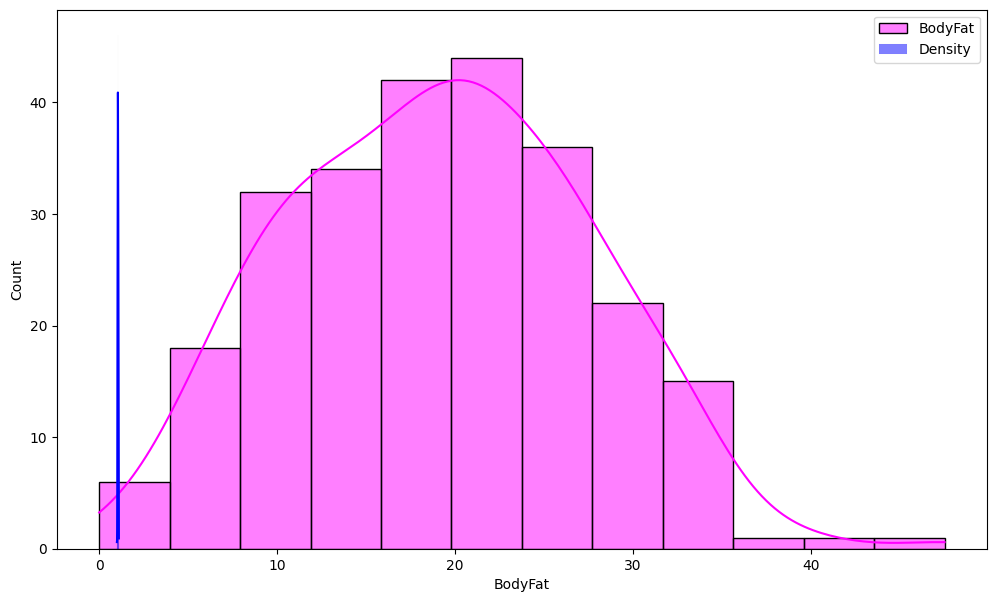

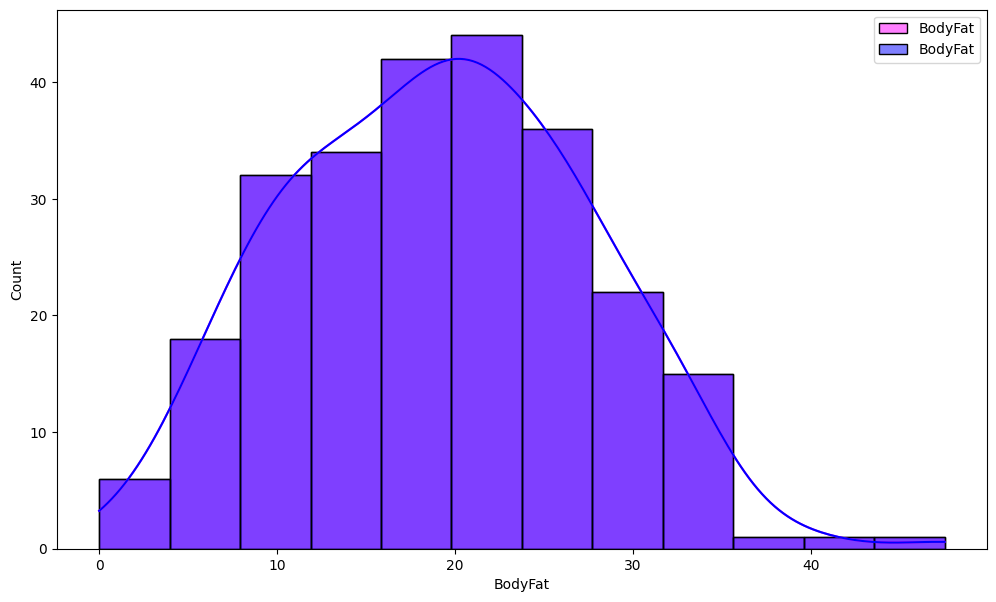

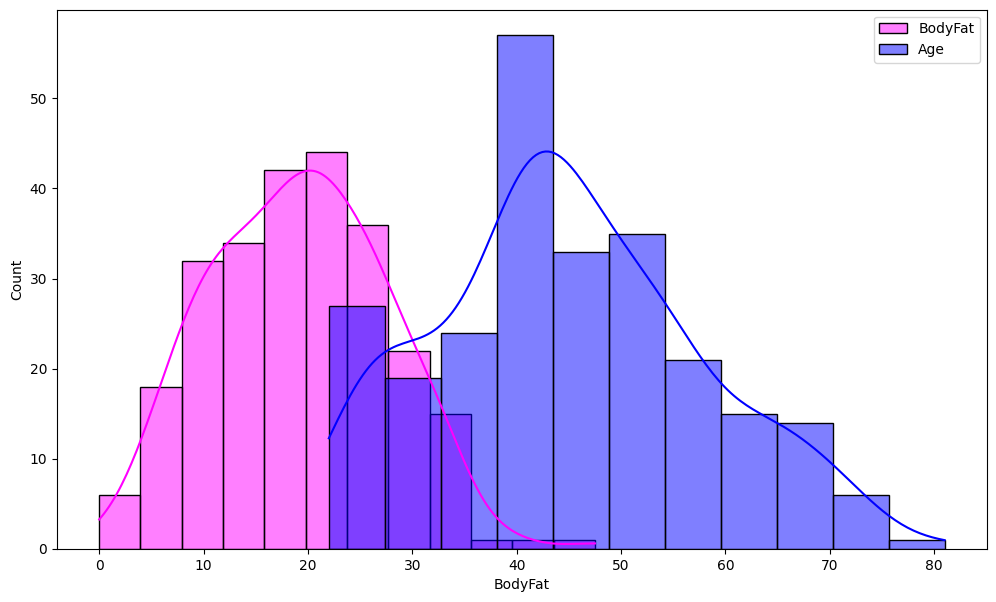

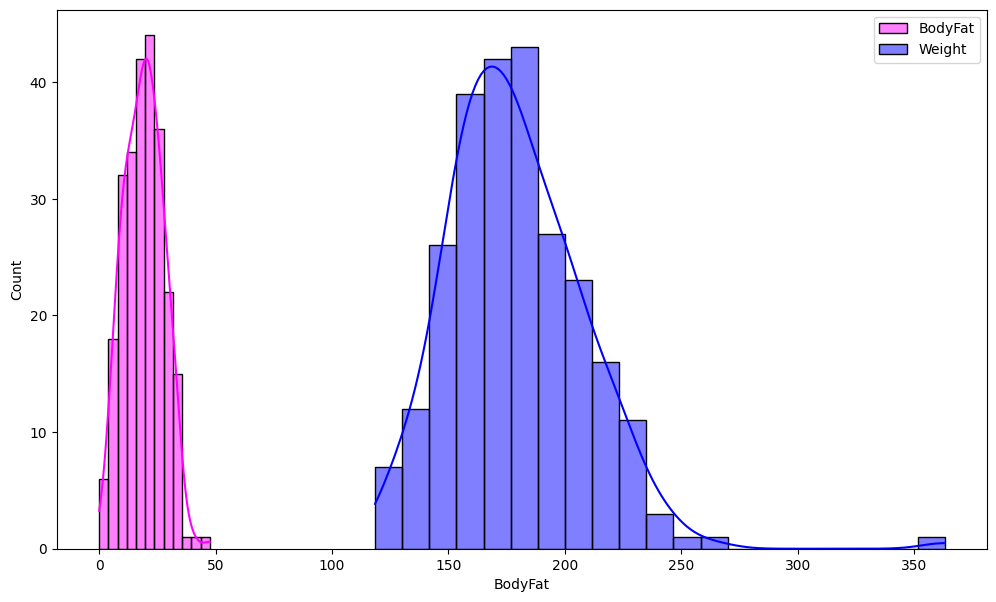

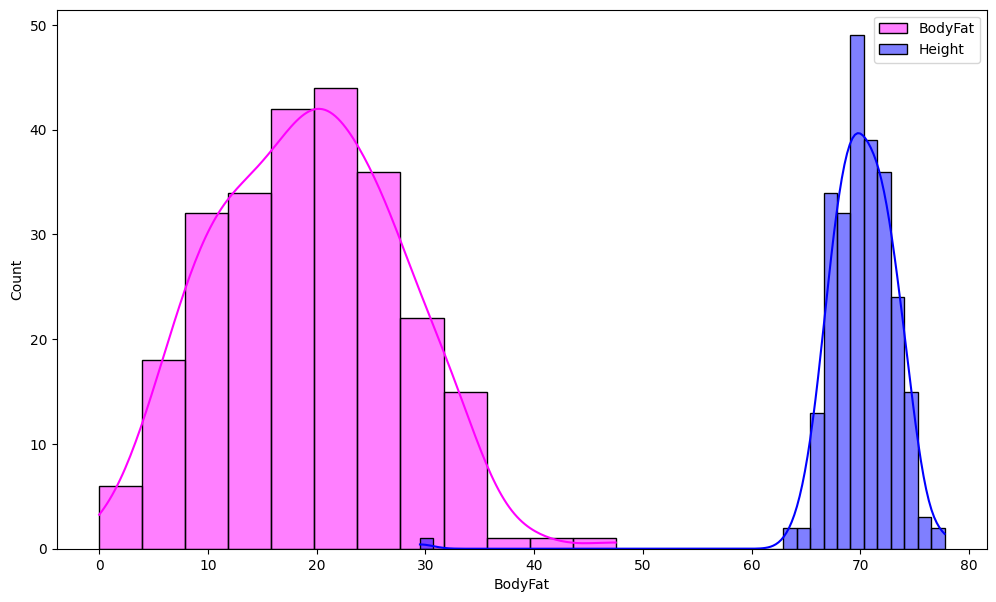

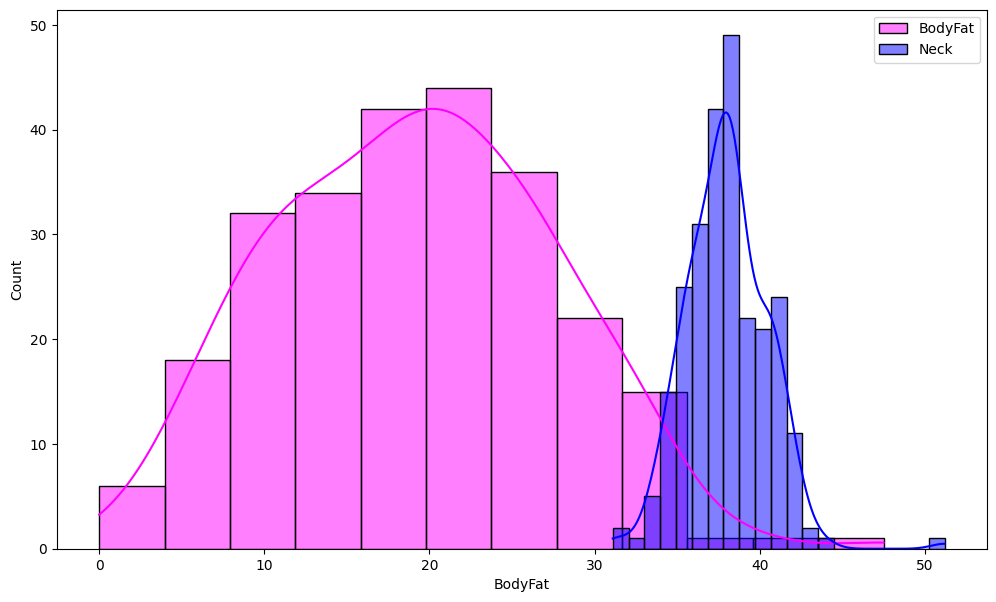

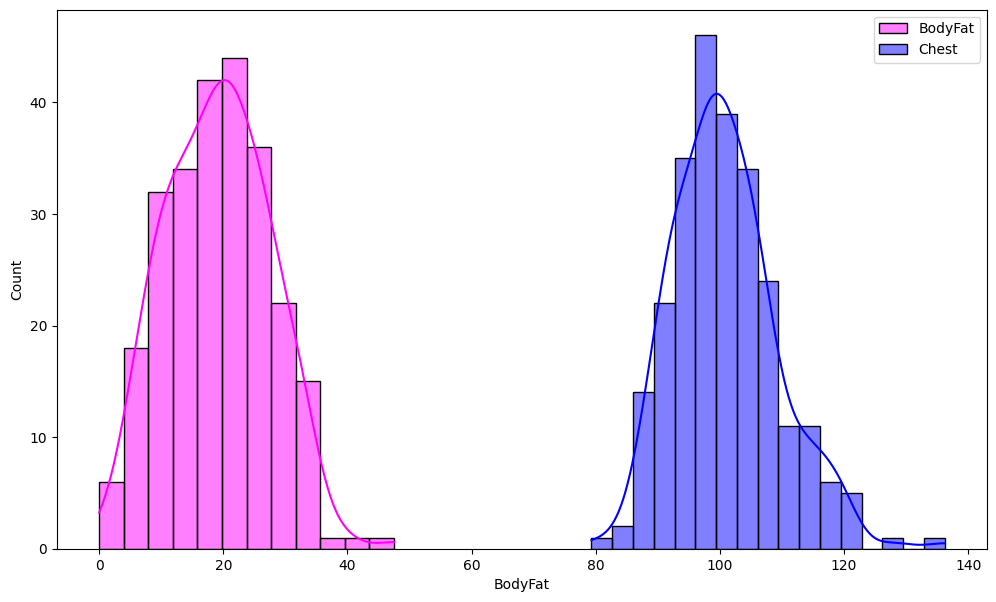

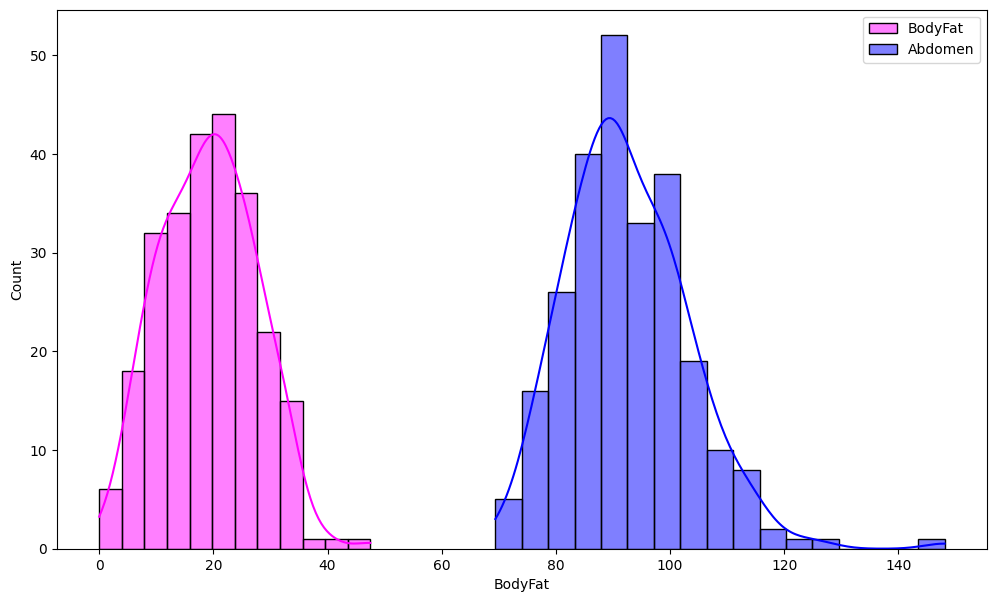

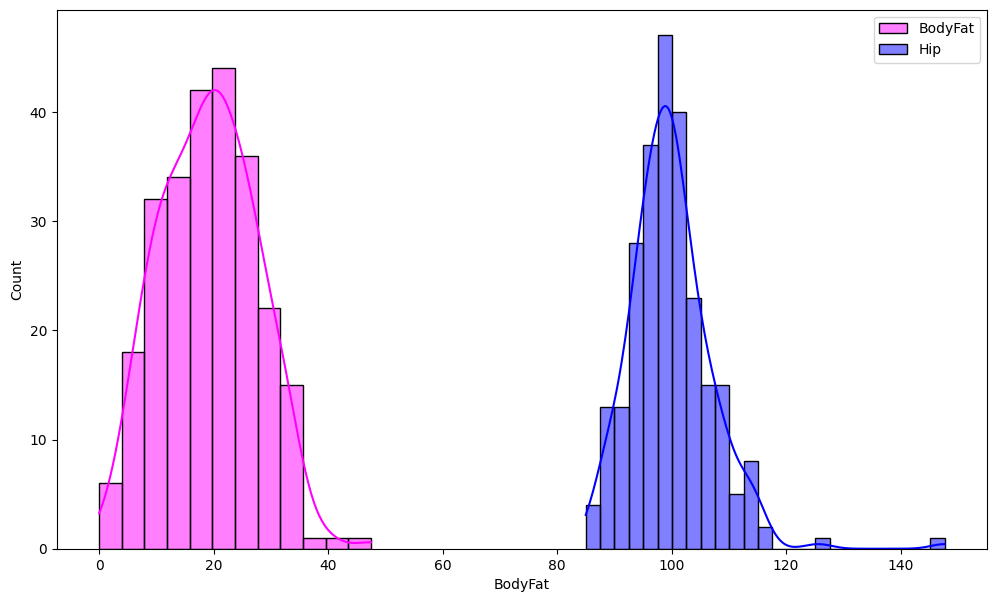

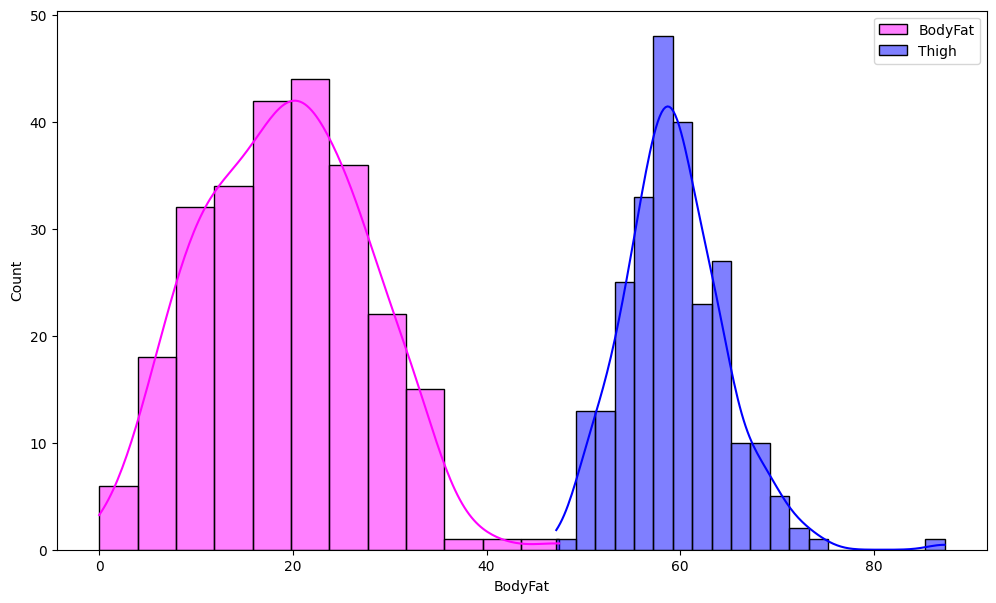

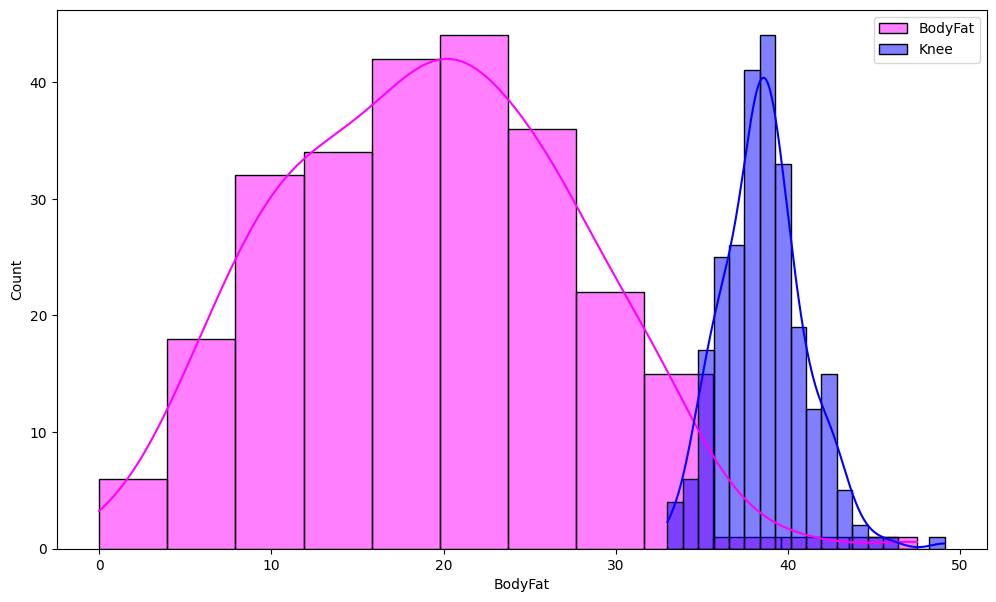

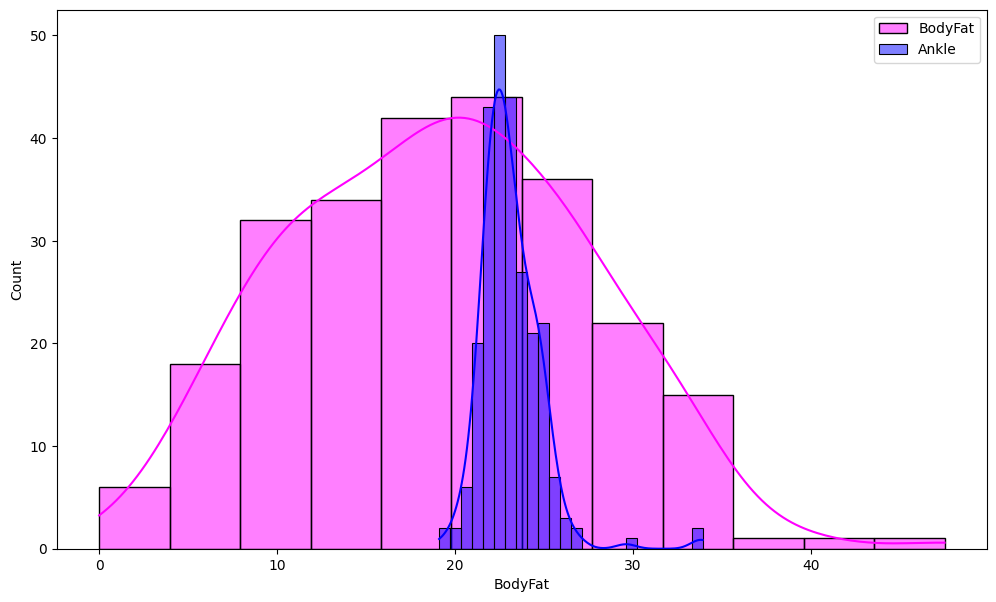

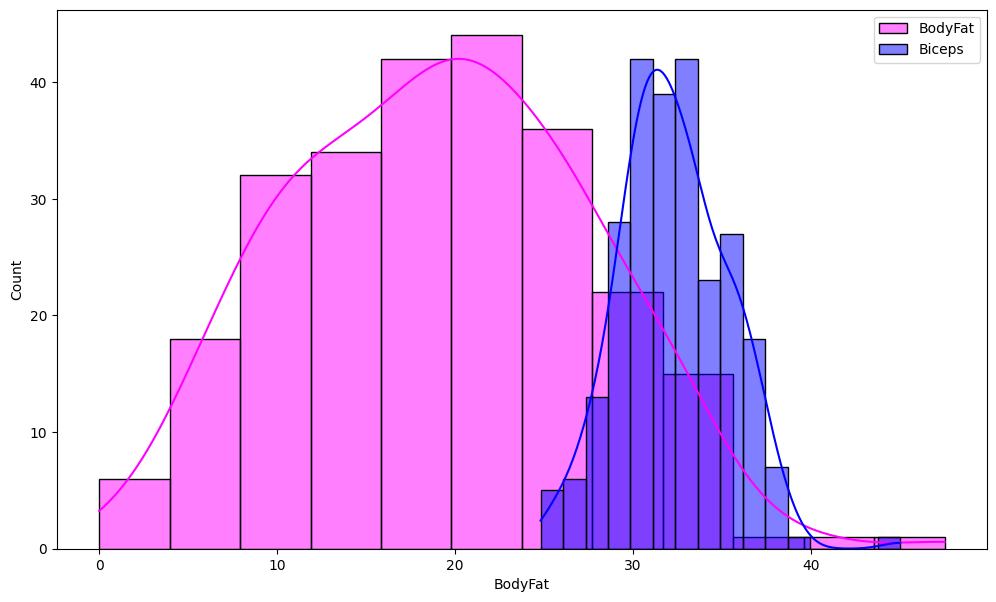

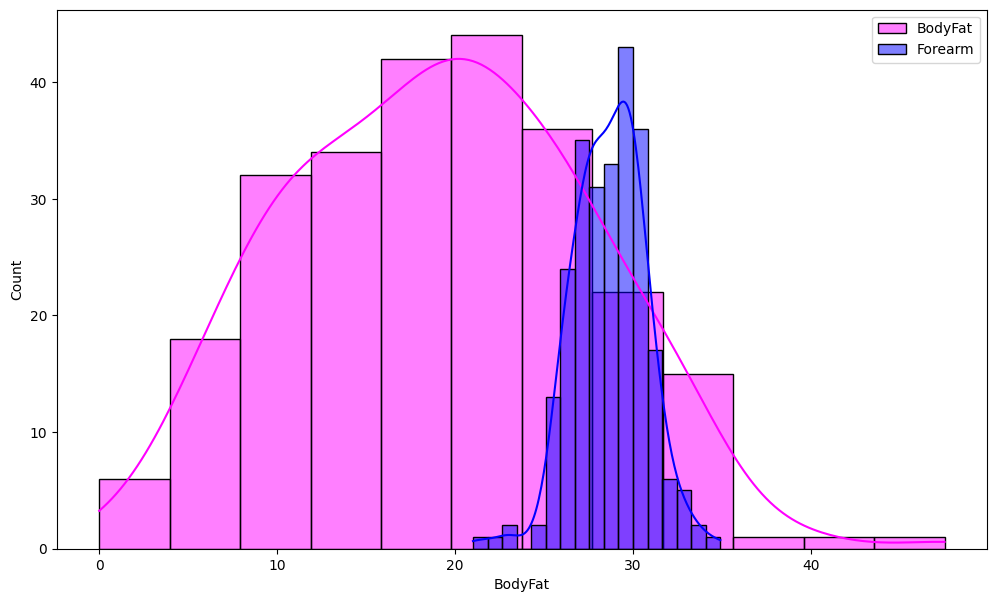

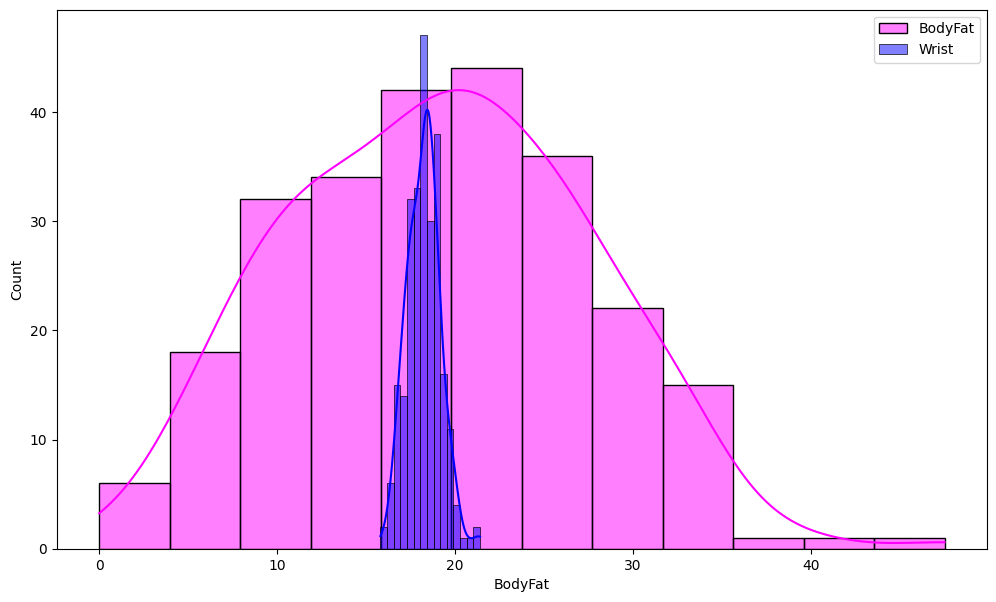

In [ ]:
#check the distribution of all numeric features if they show any gaussian distribution then linear model will be effective
def check_distribution(col):
  plt.figure(figsize=(12,7))
  sns.histplot(df['BodyFat'], color='magenta', kde=True, label='BodyFat')
  sns.histplot(df[col], color='blue', kde=True, label= col)
  plt.legend()
  plt.show()
cols = list(df.columns)
for col in cols:
  check_distribution(col)

The Distribution for the feature Density is shown


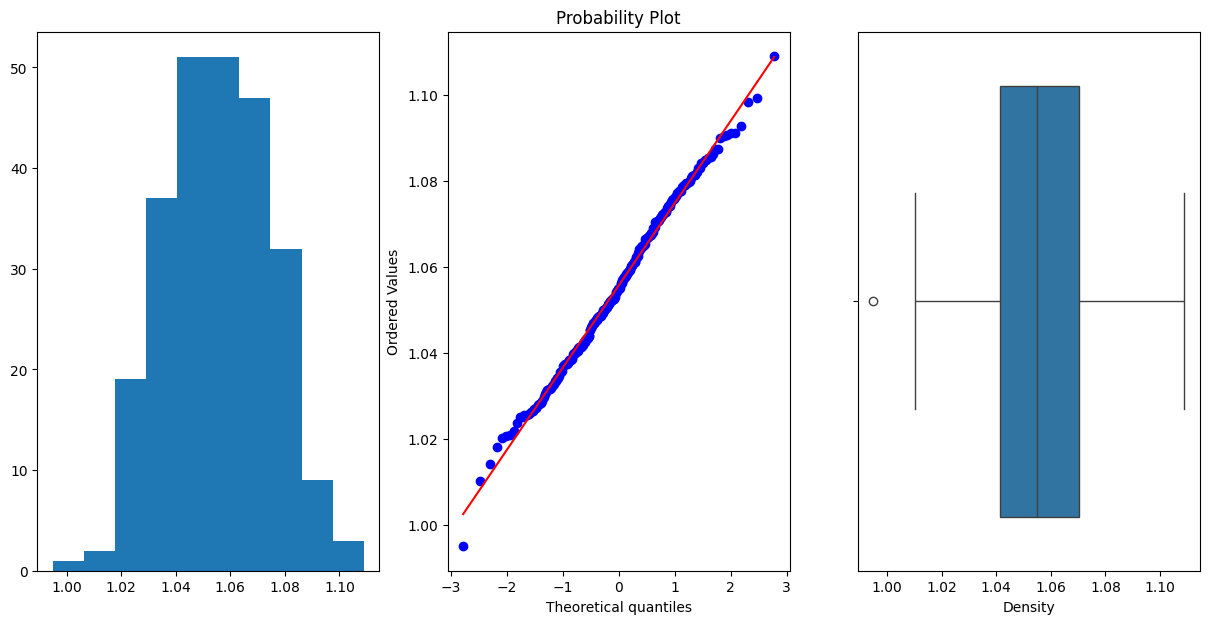

The Distribution for the feature BodyFat is shown


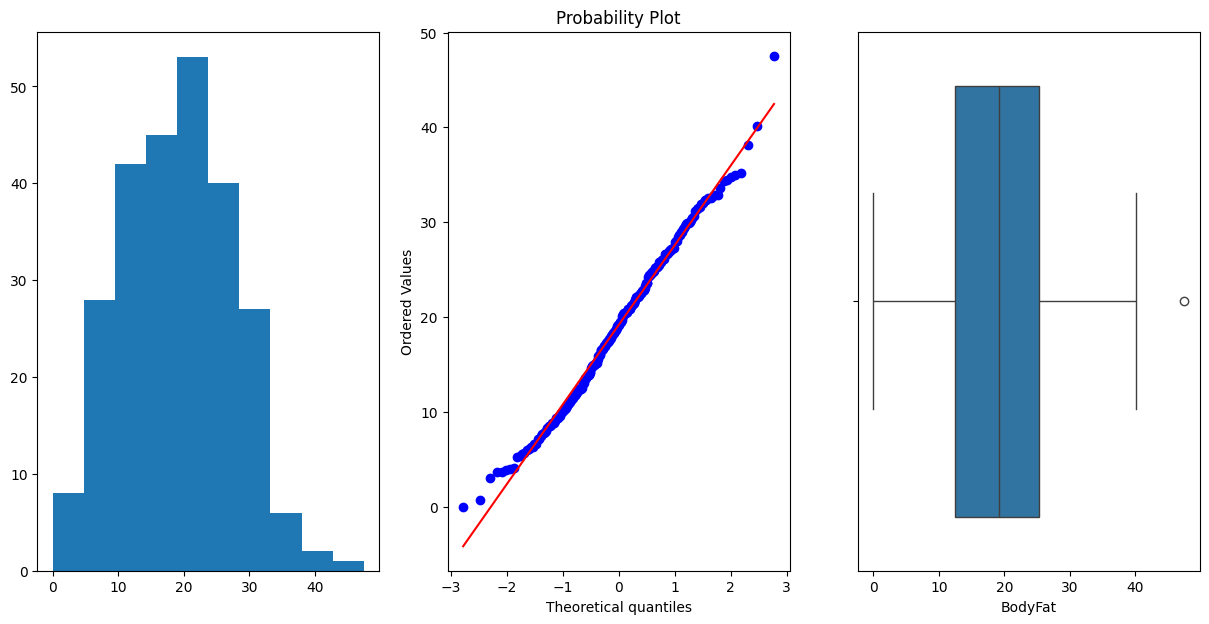

The Distribution for the feature Age is shown


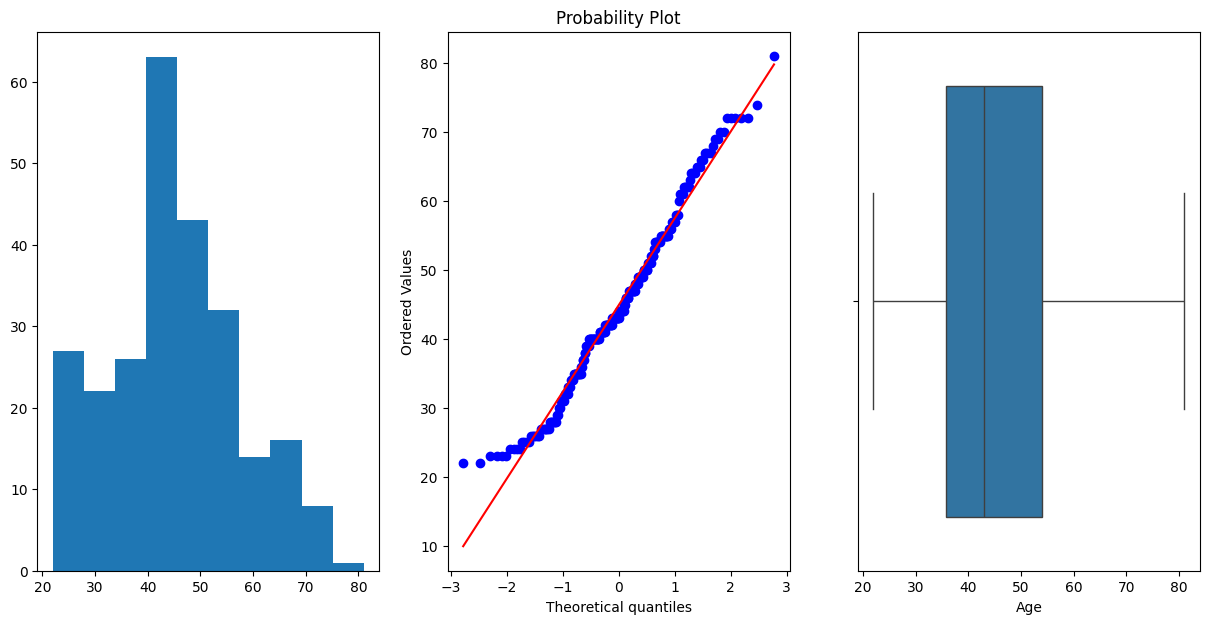

The Distribution for the feature Weight is shown


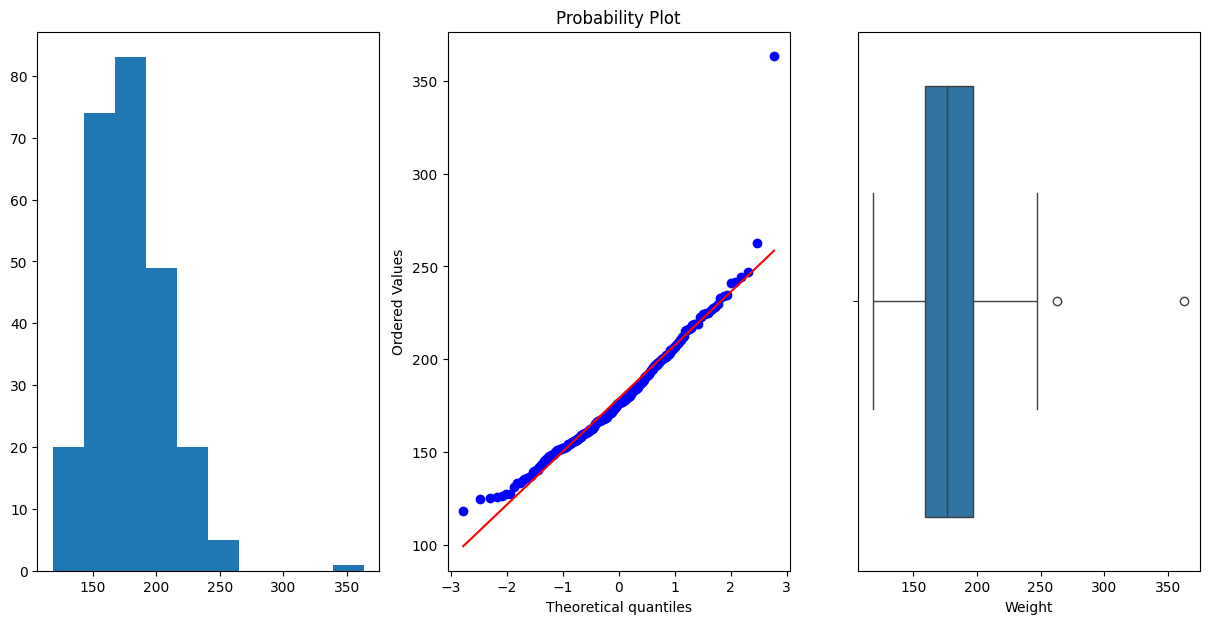

The Distribution for the feature Height is shown


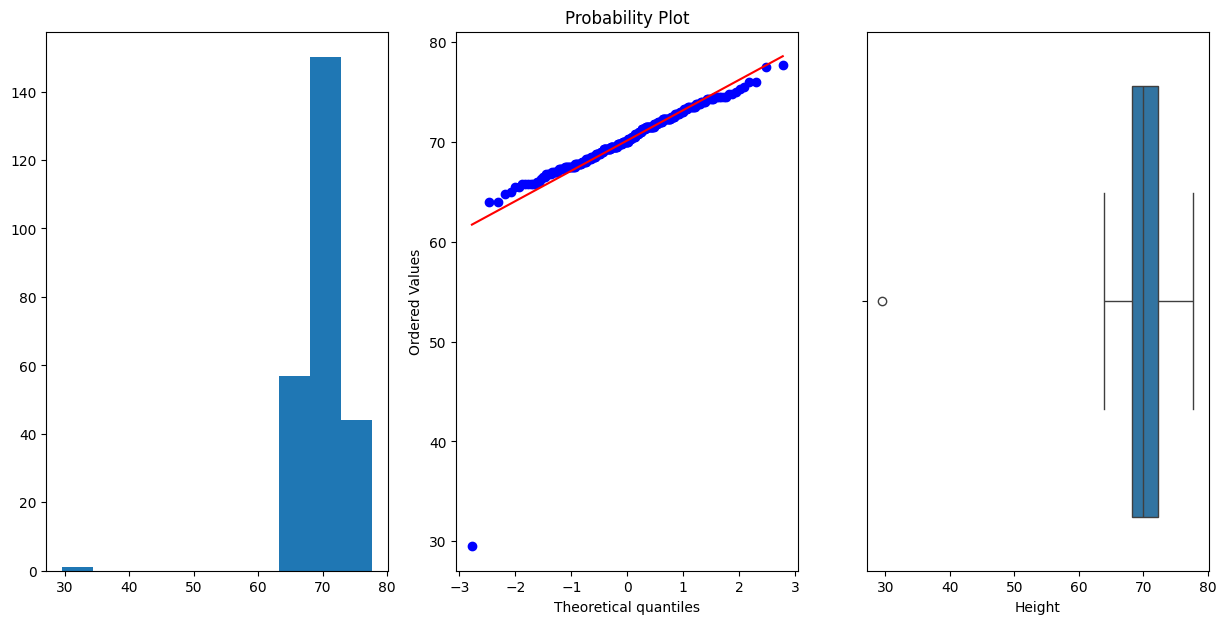

The Distribution for the feature Neck is shown


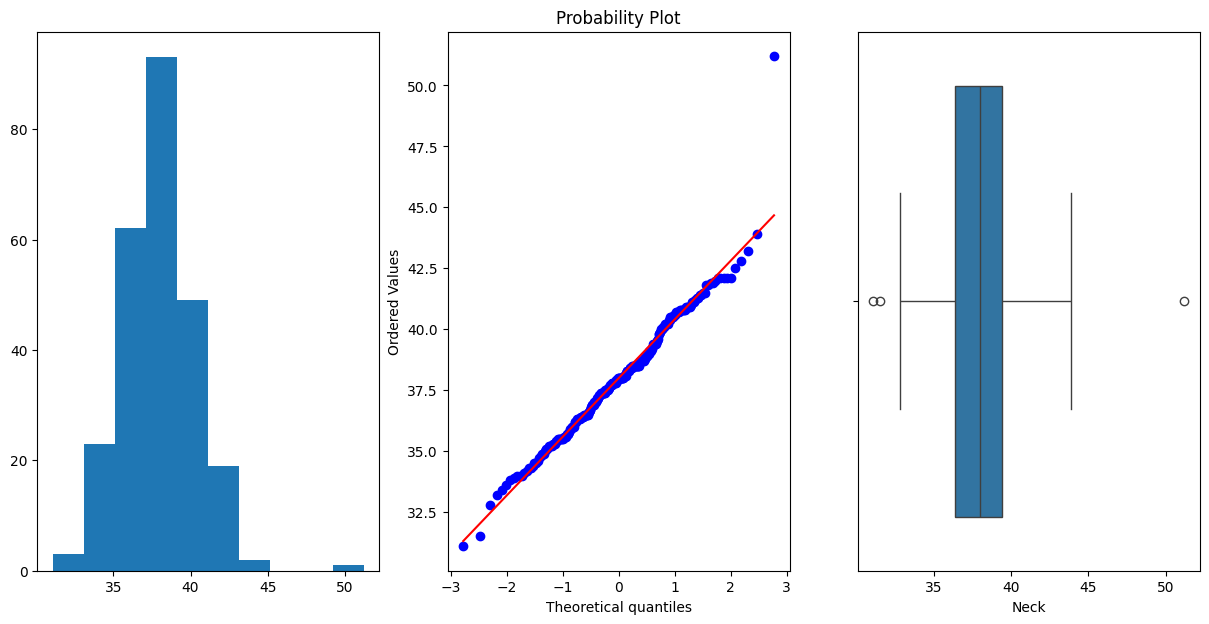

The Distribution for the feature Chest is shown


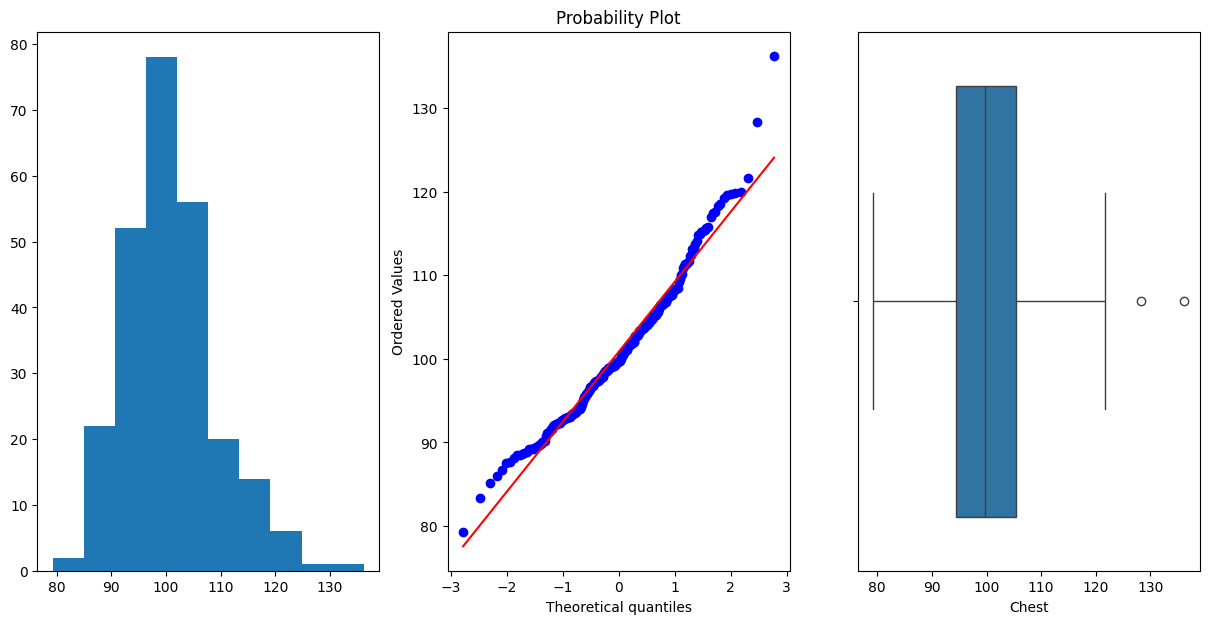

The Distribution for the feature Abdomen is shown


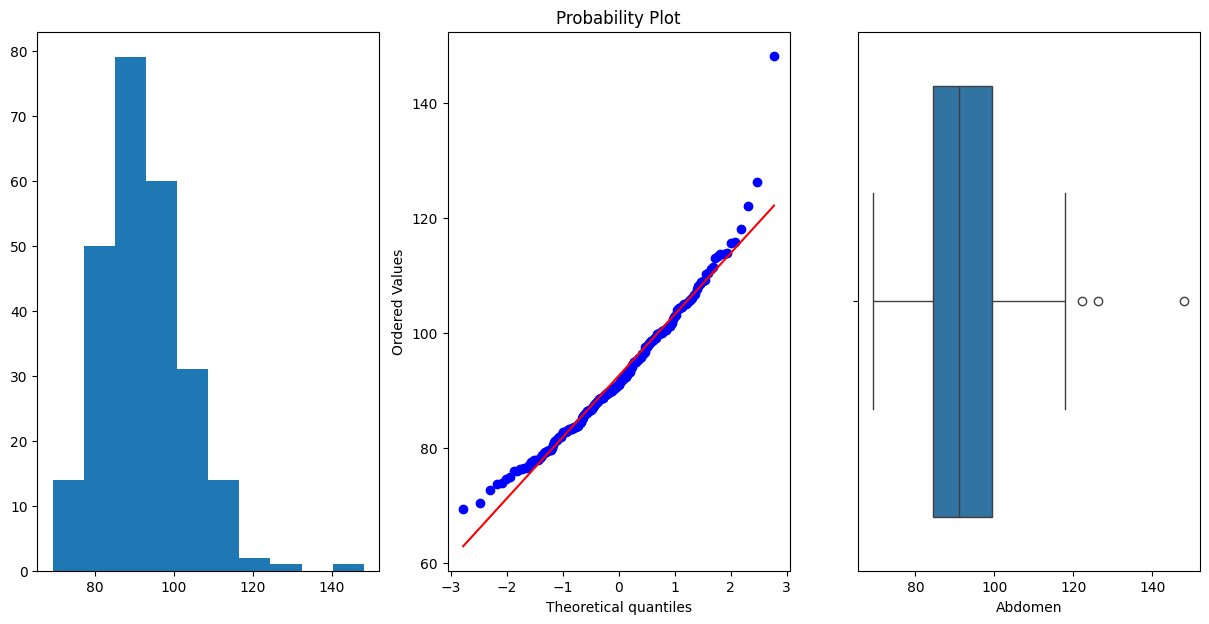

The Distribution for the feature Hip is shown


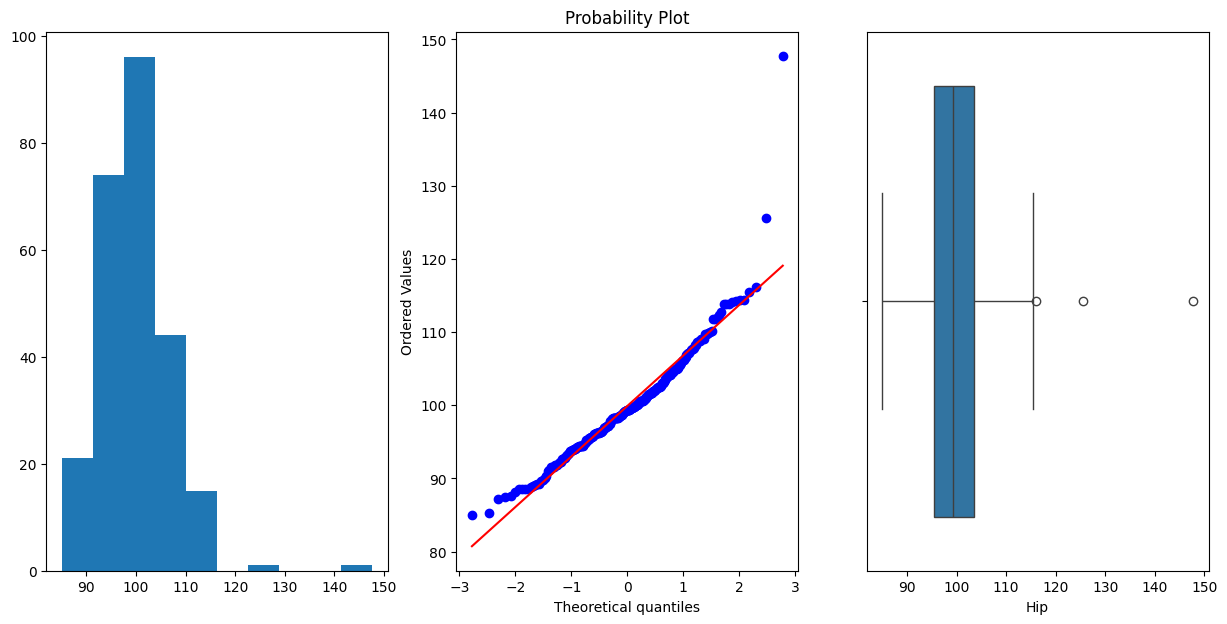

The Distribution for the feature Thigh is shown


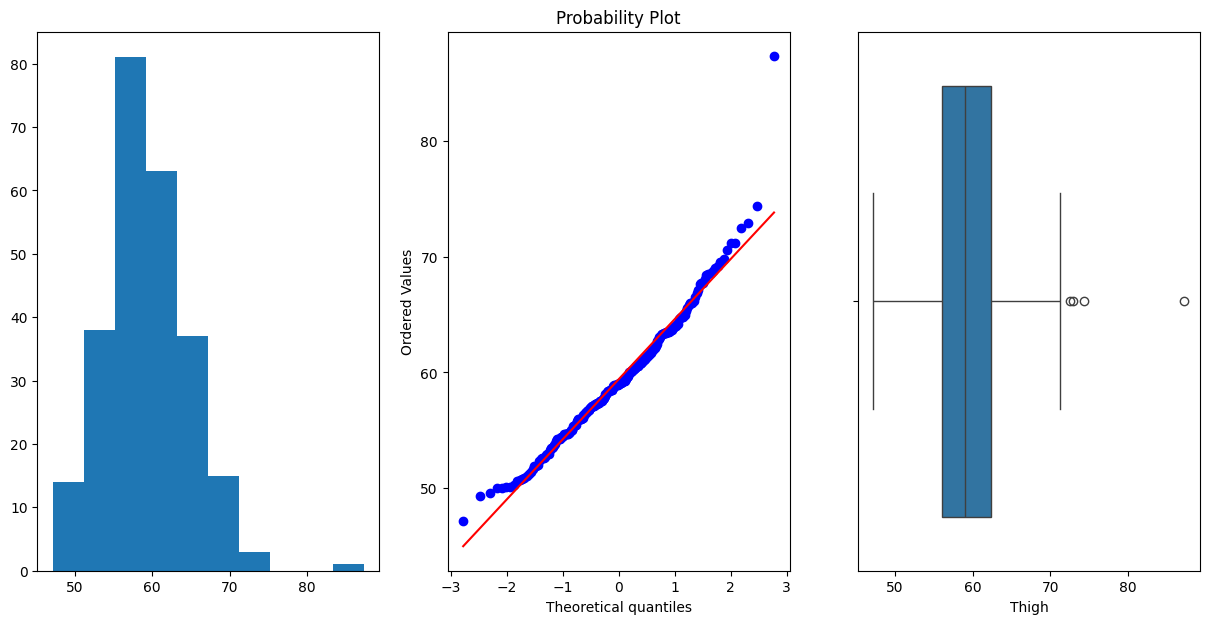

The Distribution for the feature Knee is shown


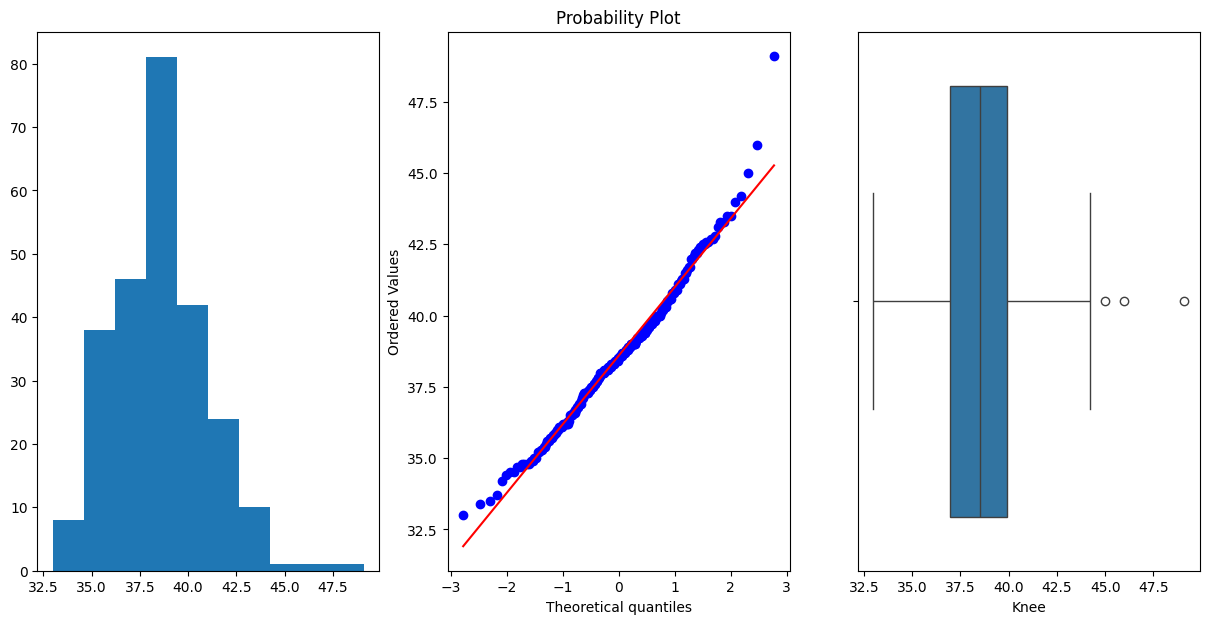

The Distribution for the feature Ankle is shown


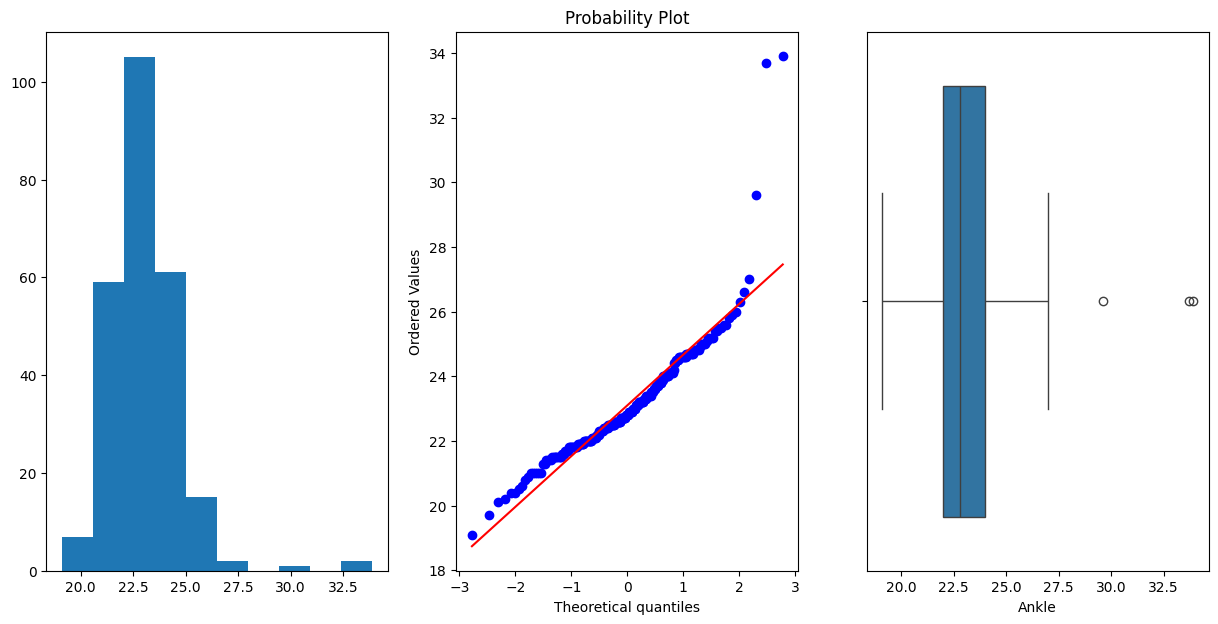

The Distribution for the feature Biceps is shown


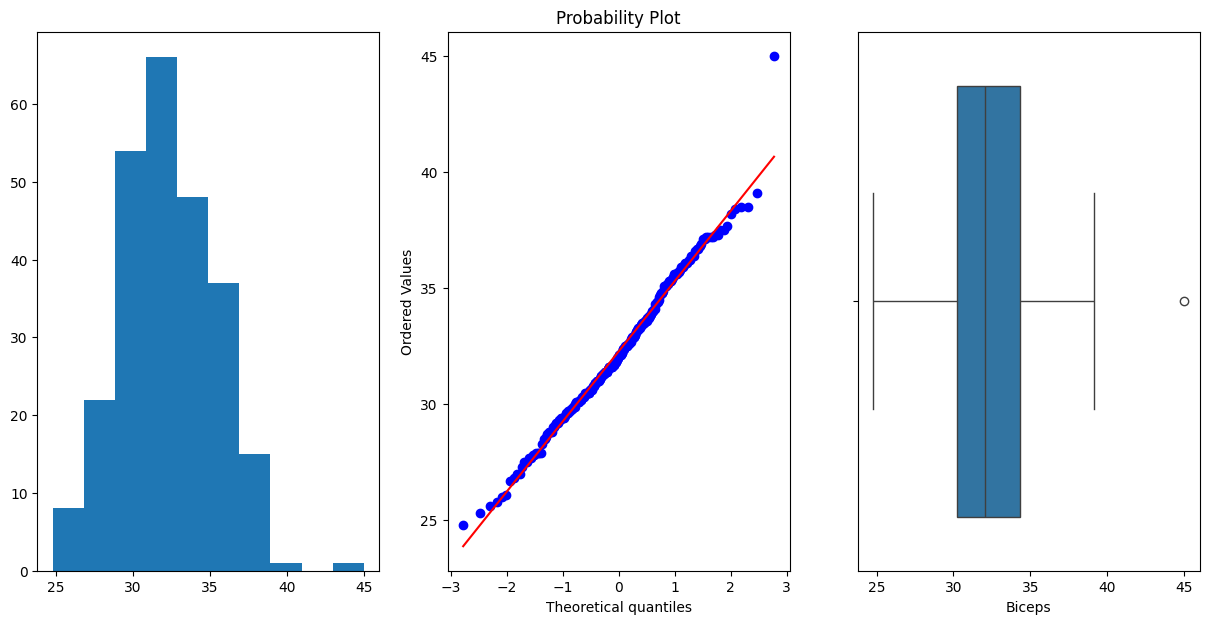

The Distribution for the feature Forearm is shown


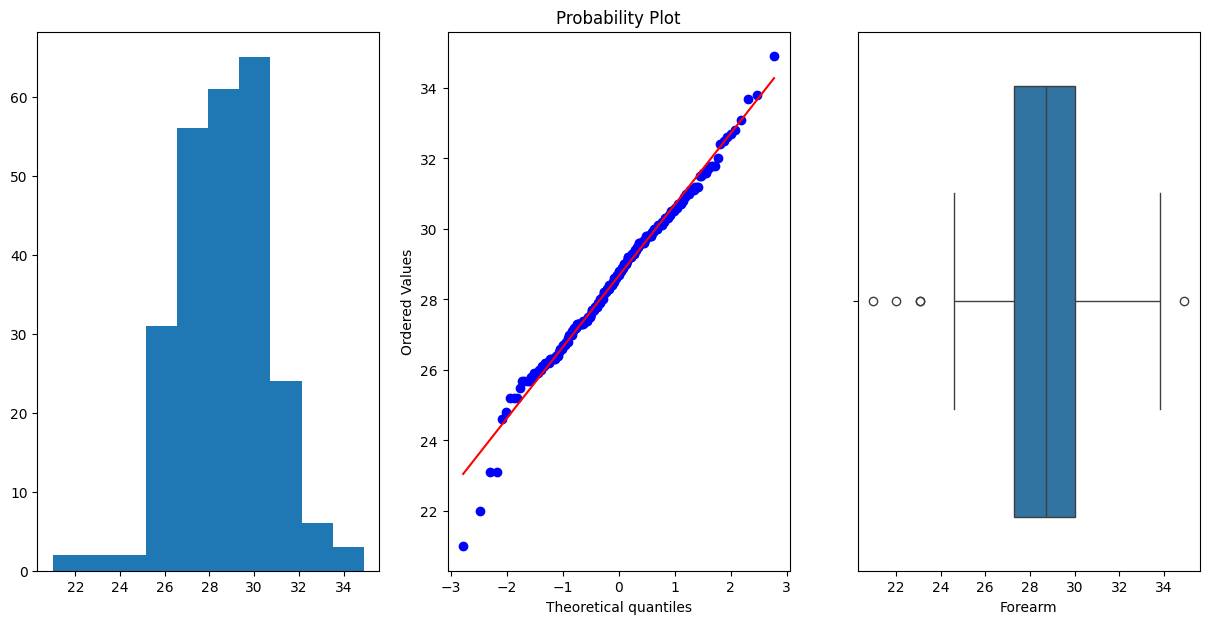

The Distribution for the feature Wrist is shown


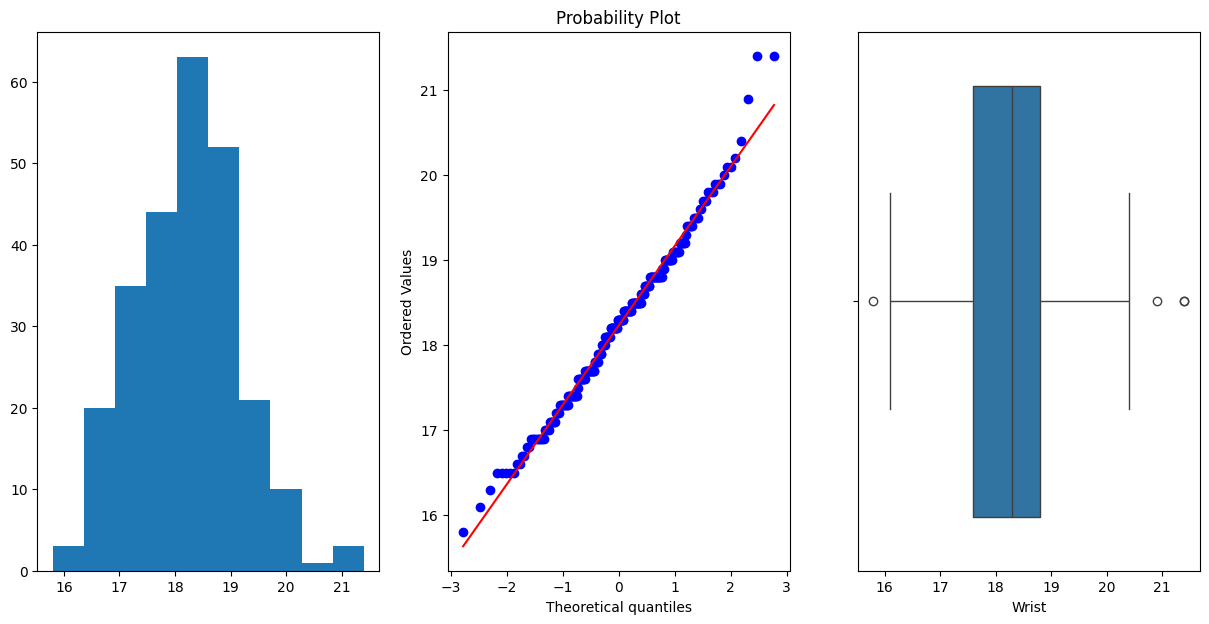

In [ ]:
from scipy import stats
def drawplots(df,col):
  plt.figure(figsize=(15,7))
  plt.subplot(1,3,1)
  plt.hist(df[col])
  plt.subplot(1,3,2)
  stats.probplot(df[col], dist='norm', plot=plt)
  plt.subplot(1,3,3)
  sns.boxplot(x=df[col])

  plt.show()
cols = list(df.columns)
for col in cols:
  print(f'The Distribution for the feature {col} is shown')
  drawplots(df,col)

In [ ]:
#Checking for outliers
upperlimit=[]
lowerlimit=[]
for col in cols:
  upperlimit.append(df[col].mean() + 3*df[col].std())
  lowerlimit.append(df[col].mean() - 3*df[col].std())

In [ ]:
col = list(df.columns)
j=0
for i in range(len(col)):
  temp = df.loc[(df[col[i]]>upperlimit[j]) & (df[col[i]]<lowerlimit[j])]
  j+=1

In [ ]:
#Feature selection
#profoundly ensemble methods give good results
data = df.copy()
test = data['BodyFat']
train= data.drop(['BodyFat'], axis=1)
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(train,test)



ExtraTreesRegressor()

In [ ]:
model.feature_importances_

array([0.71297891, 0.00169379, 0.01988427, 0.00548271, 0.00732875,
       0.06860244, 0.14825363, 0.01518437, 0.00780149, 0.00333463,
       0.00079883, 0.00613136, 0.00100597, 0.00151885])

Text(0, 0.5, 'Feature Importance Score')

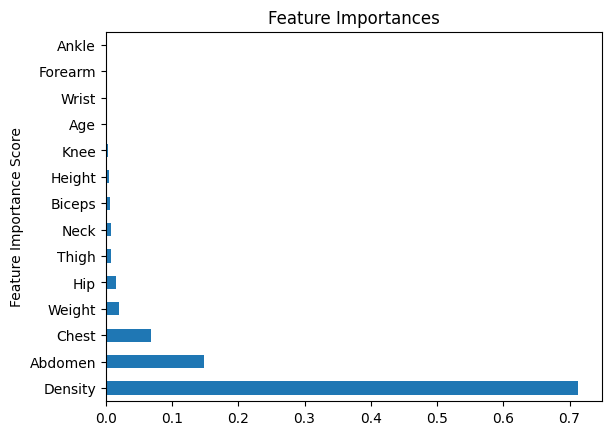

In [ ]:
series = pd.Series(model.feature_importances_, index= train.columns)
series = series.sort_values(ascending=False)
series.plot(kind='barh', title='Feature Importances')
plt.ylabel('Feature Importance Score')

In [ ]:
#mutual regressor
from sklearn.feature_selection import mutual_info_regression
mutual_info = mutual_info_regression(train, test)
mutual_info

array([3.93789207, 0.07998722, 0.29187494, 0.        , 0.10498986,
       0.34237764, 0.58496783, 0.31904908, 0.27822357, 0.21689033,
       0.04654289, 0.19923154, 0.06650826, 0.08831704])

Text(0, 0.5, 'Mutual Information Score')

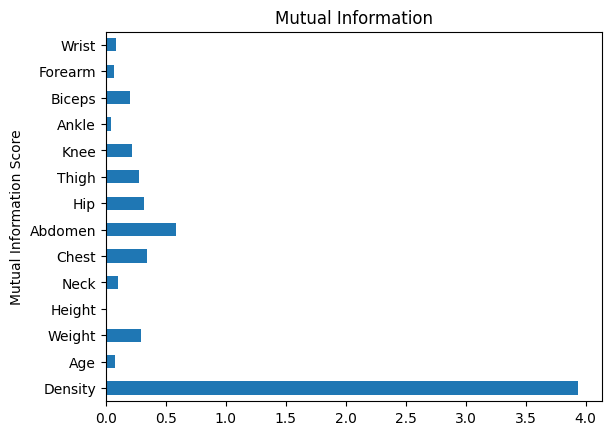

In [ ]:
plotdata = pd.Series(mutual_info, index= train.columns)
plotdata.plot(kind='barh', title='Mutual Information')
plt.ylabel('Mutual Information Score')

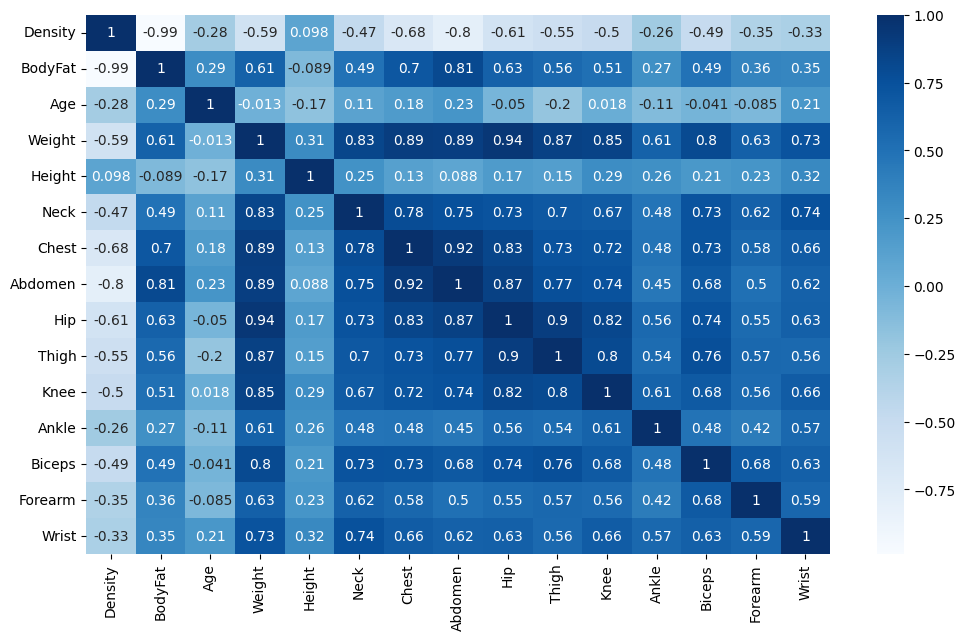

In [ ]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.show()

In [ ]:
data.corr()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
Density,1.000000,-0.987782,-0.277637,-0.594062,0.097881,-0.472966,-0.682599,-0.798955,-0.609331,-0.553091,-0.495040,-0.264890,-0.487109,-0.351648,-0.325716
BodyFat,-0.987782,1.000000,0.291458,0.612414,-0.089495,0.490592,0.702620,0.813432,0.625201,0.559608,0.508665,0.265970,0.493271,0.361387,0.346575
Age,-0.277637,0.291458,1.000000,-0.012746,-0.171645,0.113505,0.176450,0.230409,-0.050332,-0.200096,0.017516,-0.105058,-0.041162,-0.085056,0.213531
Weight,-0.594062,0.612414,-0.012746,1.000000,0.308279,0.830716,0.894191,0.887995,0.940884,0.868694,0.853167,0.613685,0.800416,0.630301,0.729775
Height,0.097881,-0.089495,-0.171645,0.308279,1.000000,0.253710,0.134892,0.087813,0.170394,0.148436,0.286053,0.264744,0.207816,0.228649,0.322065
Neck,-0.472966,0.490592,0.113505,0.830716,0.253710,1.000000,0.784835,0.754077,0.734958,0.695697,0.672405,0.477892,0.731146,0.623660,0.744826
Chest,-0.682599,0.702620,0.176450,0.894191,0.134892,0.784835,1.000000,0.915828,0.829420,0.729859,0.719496,0.482988,0.727907,0.580173,0.660162
Abdomen,-0.798955,0.813432,0.230409,0.887995,0.087813,0.754077,0.915828,1.000000,0.874066,0.766624,0.737179,0.453223,0.684983,0.503316,0.619832
Hip,-0.609331,0.625201,-0.050332,0.940884,0.170394,0.734958,0.829420,0.874066,1.000000,0.896410,0.823473,0.558387,0.739273,0.545014,0.630090
Thigh,-0.553091,0.559608,-0.200096,0.868694,0.148436,0.695697,0.729859,0.766624,0.896410,1.000000,0.799170,0.539797,0.761477,0.566842,0.558685


In [ ]:
len(data.corr())

15

In [ ]:
#Remove correlation
def correlation(df, threshold):
  col_corr= set()
  corr_matrix= df.corr()
  for i in range(len(corr_matrix)):
    for j in range(i):
      if abs(corr_matrix.iloc[i][j])> threshold:
        colname= corr_matrix.columns[i]
        print(colname)
        col_corr.add(colname)
  return col_corr
ans = correlation(train, 0.85)
ans

Chest
Abdomen
Abdomen
Hip
Hip
Thigh
Thigh
Knee


/tmp/ipython-input-60-224815302.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if abs(corr_matrix.iloc[i][j])> threshold:


{'Abdomen', 'Chest', 'Hip', 'Knee', 'Thigh'}

In [ ]:
#remove correlation with variance inflaion factor for correlation and homosedascticity
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(train.values, i) for i in range(train.shape[1])]
vif['Features'] = train.columns
vif

,vif,Features
0,2710.196700,Density
1,31.087967,Age
2,927.258823,Weight
3,582.893107,Height
4,1081.582064,Neck
5,1327.734644,Chest
6,992.381183,Abdomen
7,2823.599196,Hip
8,1001.990668,Thigh
9,1174.133421,Knee


In [ ]:
!pip install statsmodels

In [ ]:
cols1 = list(series.nlargest(5).index)
cols2= list(plotdata.nlargest(5).index)
cols1, cols2

(['Density', 'Abdomen', 'Chest', 'Weight', 'Hip'],
 ['Density', 'Abdomen', 'Chest', 'Hip', 'Weight'])

In [ ]:
totrain= train[cols1]
totrain.head()

,Density,Abdomen,Chest,Weight,Hip
0,1.0708,85.2,93.1,154.25,94.5
1,1.0853,83.0,93.6,173.25,98.7
2,1.0414,87.9,95.8,154.00,99.2
3,1.0751,86.4,101.8,184.75,101.2
4,1.0340,100.0,97.3,184.25,101.9


In [ ]:
#Now lets begin with the model building phase-
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(totrain, test, test_size=0.2)

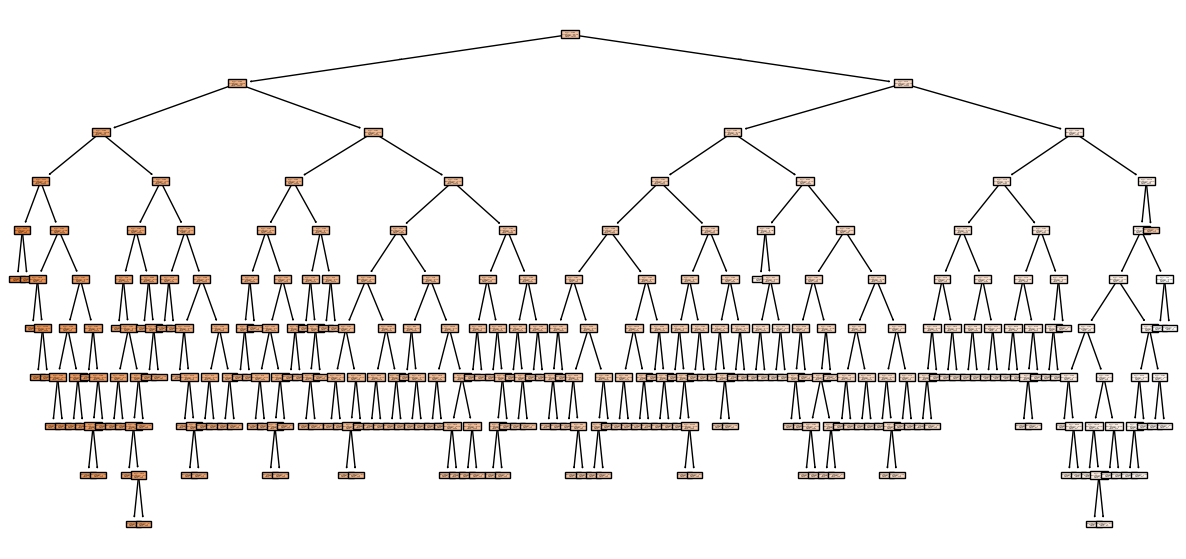

In [ ]:
from sklearn import tree
reg= DecisionTreeRegressor()
model= reg.fit(X_train, Y_train)
plt.figure(figsize=(15,7))
tree.plot_tree(reg, filled=True)
plt.show()

In [ ]:
#the tree is pretty large- hence we will prune this tree
path = reg.cost_complexity_pruning_path(X_train, Y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

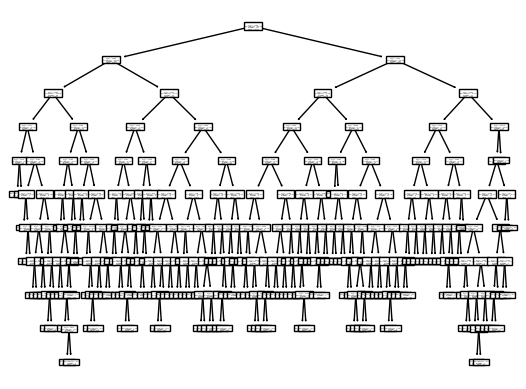

In [ ]:
tree.plot_tree(reg)
plt.show()

In [ ]:
alphalist=[]
for i in range(len(ccp_alphas)):
  reg = DecisionTreeRegressor(ccp_alpha=ccp_alphas[i])
  reg.fit(X_train, Y_train)
  alphalist.append(reg)


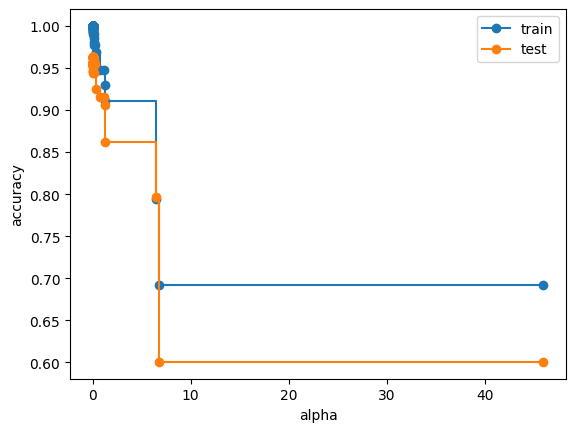

In [ ]:
trainscore= [alphalist[i].score(X_train, Y_train) for i in range(len(alphalist))]
testscore= [alphalist[i].score(X_test, Y_test) for i in range(len(alphalist))]

plt.xlabel('alpha')
plt.ylabel('accuracy')
plt.plot(ccp_alphas, trainscore, marker='o', label='train', drawstyle='steps-post')
plt.plot(ccp_alphas, testscore, marker='o', label='test', drawstyle='steps-post')
plt.legend()
plt.show()

In [ ]:
#normal approach
clf= DecisionTreeRegressor(ccp_alpha=1)
clf.fit(X_train, Y_train)
y_pred=clf.predict(X_test)
print("Decision Tree Approach the metric is", r2_score(Y_test, y_pred))

rf= RandomForestRegressor(n_estimators=1000, ccp_alpha=1)
rf.fit(X_train, Y_train)
y_pred=rf.predict(X_test)
print("Random Forest Approach the metric is", r2_score(Y_test, y_pred))

Decision Tree Approach the metric is 0.9157544919880448
Random Forest Approach the metric is 0.928727630137491


In [ ]:
#HyperParameter Tuning
params = {
    'RandomForest':{
        'model': RandomForestRegressor(),
        'params': {
            'n_estimators': [int(x) for x in np.linspace(start=100, stop=1200, num=12)],
            'max_depth': [int(x) for x in np.linspace(start=1, stop=30, num=5)],
            'criterion': ["squared_error","absolute_error"], # 'mse' and 'mme' are deprecated in newer versions
            'min_samples_split': [2,5,10,15,100],
            'min_samples_leaf': [1,2,5,10],
            'max_features': ['sqrt', 'log2'], # 'auto' and 'sqrt' have been replaced by 'sqrt' and 'log2' or a float value
            'bootstrap': [True, False],
            'ccp_alpha': [1,2,2.3,3,3.5,4,5]
        }
    },

   'D-Tree':{
        'model': DecisionTreeRegressor(),
        'params': {
            'criterion': ["squared_error","absolute_error"], # 'mse' and 'mme' are deprecated in newer versions
            'splitter': ['best','random'],
            'min_samples_split': [2,5,10,15,100],
            'min_samples_leaf': [1,2,5,10],
            'max_features': ['sqrt', 'log2'], # 'auto' and 'sqrt' have been replaced by 'sqrt' and 'log2' or a float value
            'ccp_alpha': [1,2,2.3,3,3.5,4,5]
        }
    },
    'SVM':{
        'model': SVR(),
        'params': {
            'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
            'C': [0.1, 1, 10, 100, 1000],
            'max_iter': [int(x) for x in np.linspace(start=1, stop=250, num=5)]
        }
    },
}

from sklearn.svm import SVR

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
scores= []
for modelname,mp in params.items():
  clf= RandomizedSearchCV(mp['model'], mp['params'], param_distributions= mp['params'], n_jobs=-1, n_iter=10, cv=5,scoring='neg_mean_squared_error', return_train_score=False)
  clf.fit(X_train, Y_train)
  scores.append({
      'model': modelname,
      'best_score': clf.best_score_,
      'best_params': clf.best_params_
  })

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=125).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [ ]:
scoresdf = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
scoresdf

,model,best_score,best_params
0,RandomForest,-5.708930,"{'n_estimators': 800, 'min_samples_split': 2, ..."
1,D-Tree,-14.944713,"{'splitter': 'best', 'min_samples_split': 2, '..."
2,SVM,-43.785746,"{'max_iter': 125, 'kernel': 'rbf', 'C': 1000}"


In [ ]:
rf_best_params = scores[0]['best_params']
rf_model = RandomForestRegressor(n_estimators=1000, ccp_alpha=1)
rf_model.fit(X_train, Y_train)
y_pred = rf_model.predict(X_test)
print("Random Forest Approach the metric is", r2_score(Y_test, y_pred))

Random Forest Approach the metric is 0.9290606938774797


In [ ]:
totrain = totrain.drop(['Actual Result', 'Predicted Result'], axis=1)

In [ ]:
totrainlist = np.array(totrain)
predicted=[]
for i in range(len(totrainlist)):
  predicted.append(rf_model.predict([totrainlist[i]]))
totrain['Actual Result']= test
totrain['Predicted Result']= np.array(predicted)
totrain.head()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/

,Density,Abdomen,Chest,Weight,Hip,Actual Result,Predicted Result
0,1.0708,85.2,93.1,154.25,94.5,12.3,12.997181
1,1.0853,83.0,93.6,173.25,98.7,6.1,7.043825
2,1.0414,87.9,95.8,154.00,99.2,25.3,25.272630
3,1.0751,86.4,101.8,184.75,101.2,10.4,9.312804
4,1.0340,100.0,97.3,184.25,101.9,28.7,29.681926


/tmp/ipython-input-94-1123513120.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(totrain['Actual Result'], label='Actual Result')
/tmp/ipython-input-94-1123513120.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(totrain['Predicted Result'], label='Predicted Result')


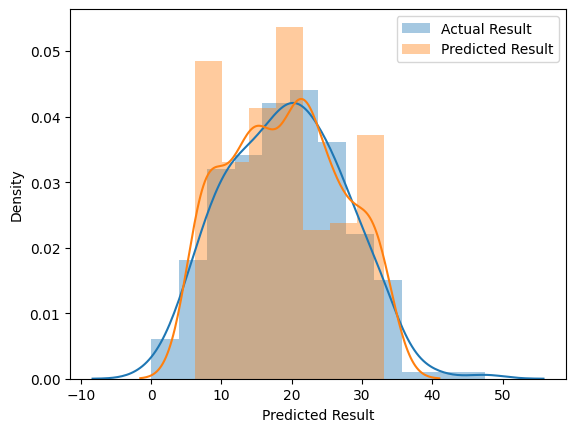

In [ ]:
sns.distplot(totrain['Actual Result'], label='Actual Result')
sns.distplot(totrain['Predicted Result'], label='Predicted Result')
plt.legend()
plt.show()

In [ ]:
import pickle
file = open('bodyfatmodel.pkl', 'wb')
pickle.dump(rf, file)
file.close

<function BufferedWriter.close>